In [149]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
import numpy as np
import torch
from matplotlib import pyplot as plt
%matplotlib inline
print(torch.cuda.is_available())

True


In [156]:
#ファイル入力
def file_input(input_path):
    with open(input_path,encoding='UTF-8-sig') as f:
        s = f.read()
    s = s.strip().replace('\t','\n').replace('.','')
    sentences = s.split('\n')
    ps = PorterStemmer()
    for i in range(len(sentences)):
        token = sentences[i].split(' ')
        singles = [ps.stem(plural) for plural in token]
        #sentences[i] = token
        sentences[i] = singles
    return sentences

In [165]:
# 単語IDの登録
def word_to_id(sentences:list):
    word_id_list = {}
    id_count = 0
    for sentence in sentences:
        for token in sentence:
            if(token not in word_id_list):        
                word_id_list[token] = id_count
                id_count += 1
    return word_id_list

In [166]:
def sub_char(sentences:list):
    new_sentenes = []
    for sentence in sentences:
        new_sentence = []
        for word in sentence:
            w = word.replace(':','').replace(';','').replace('(','').replace(')','').replace(',','').replace('.','').replace('"','')
            if w.isdecimal():
                w = 'N'
            new_sentence.append(w)
        new_sentenes.append(new_sentence)
    return new_sentenes

In [153]:
def get_n_gram(sentences:list):
    ngrams = []
    for sentence in sentences:
        l = len(sentence)
        for i in range(l-2):
            list = [sentence[i],sentence[i+2]]
            ngrams.append((list,sentence[i+1]))
    return ngrams

In [154]:
class CBOW(torch.nn.Module):
    def __init__(self,vocab_size,embedding_dim,context_size):
        super(CBOW,self).__init__()
        self.embeddings = torch.nn.Embedding(vocab_size,embedding_dim)
        self.linear1 = torch.nn.Linear(context_size*embedding_dim,128)
        self.linear2 = torch.nn.Linear(128,vocab_size)

    def forward(self,inputs):
        embeds = self.embeddings(inputs).view(1,-1)
        out = torch.nn.functional.relu(self.linear1(embeds))
        out = self.linear2(out)
        return out

In [167]:

input_path = '../train_data/STS.input.OnWN.txt'
#input_path = '../test_data/testinput.txt'
output_path = './output/STS.output.images.tt'
#output_path = './output/testoutput.txt'
# nltk.download('stopwords')
# stopwords = nltk.corpus.stopwords.words('english')

#ファイル入力
sentences = file_input(input_path)
sentences += file_input('../train_data/STS.input.deft-news.txt')
sentences += file_input('../train_data/STS.input.headlines.txt')
sentences += file_input('../train_data/STS.input.MSRpar.txt')
sentences += file_input('../train_data/STS.input.MSRvid.txt')
# sentences = sentences[0:2]
#print(sentences)
sentences = sub_char(sentences)
#print(sentences)

word_to_ix = word_to_id(sentences)
print(word_to_ix)
vocab_size = len(word_to_ix)
print(vocab_size)

ngrams = get_n_gram(sentences)
#print(ngrams)

# x,y = create_contexts_target(sentences)
# random.shuffle(x)
# random.shuffle(y)
# vocab_size = len(x)
# print(vocab_size)

{'the': 0, 'activ': 1, 'of': 2, 'learn': 3, 'or': 4, 'be': 5, 'train': 6, 'gradual': 7, 'process': 8, 'acquir': 9, 'knowledg': 10, 'thin': 11, 'metal': 12, 'strip': 13, 'use': 14, 'in': 15, 'typeset': 16, 'to': 17, 'separ': 18, 'line': 19, 'type': 20, 'print': 21, 'falcon': 22, 'abandon': 23, 'intend': 24, 'game': 25, 'and': 26, 'pursu': 27, 'lesser': 28, 'prey': 29, 'turn': 30, 'an': 31, 'inferior': 32, 'act': 33, 'design': 34, 'a': 35, 'role': 36, 'someon': 37, 'identifi': 38, 'someth': 39, 'make': 40, 'pure': 41, 'free': 42, 'from': 43, 'sin': 44, 'guilt': 45, 'leav': 46, 'undon': 47, 'out': 48, 'fail': 49, 'do': 50, 'something': 51, 'social': 52, 'set': 53, 'cliqu': 54, 'friend': 55, 'unoffici': 56, 'associ': 57, 'peopl': 58, 'group': 59, 'upper': 60, 'part': 61, 'column': 62, 'that': 63, 'support': 64, 'entablatur': 65, 'sink': 66, 'lower': 67, 'level': 68, 'descend': 69, 'form': 70, 'depress': 71, 'creat': 72, 'code': 73, 'comput': 74, 'program': 75, 'write': 76, 'releas': 77, 'c

In [36]:
# #device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# #torch.set_default_tensor_type('torch.cuda.FloatTensor')
# CONTEXT_SIZE = 2
# EMBEDDING_DIM = 10

# losses = []
# loss_function = torch.nn.CrossEntropyLoss()
# model = CBOW(vocab_size,EMBEDDING_DIM,CONTEXT_SIZE)
# optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
# for epoch in range(400):
#     total_loss = torch.Tensor([0])
#     for context,target in ngrams:
#         context_idxs = [word_to_ix[w] for w in context]
#         # print(context_idxs)
#         context_var = torch.autograd.Variable(torch.LongTensor(context_idxs))
#         # print(context_var)
#         model.zero_grad()
#         output = model(context_var)
#         loss = loss_function(output,torch.autograd.Variable(torch.LongTensor([word_to_ix[target]])))
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.data
#     losses.append(total_loss.detach().numpy()[0])
#     print(epoch,total_loss)

In [ ]:
# device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
torch.set_default_tensor_type('torch.cuda.FloatTensor')
CONTEXT_SIZE = 2
EMBEDDING_DIM = 300
EPOCH_SIZE = 400

losses = []
epochs = []
loss_function = torch.nn.CrossEntropyLoss()
model = CBOW(vocab_size,EMBEDDING_DIM,CONTEXT_SIZE).to('cuda')
#model.load_state_dict(torch.load(PATH))
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
for epoch in range(EPOCH_SIZE):
    total_loss = torch.Tensor([0])
    for context,target in ngrams:
        context_idxs = [word_to_ix[w] for w in context]
        # print(context_idxs)
        # context_var = torch.autograd.Variable(torch.LongTensor(context_idxs)).to(device)
        context_var = torch.autograd.Variable(torch.LongTensor(context_idxs)).to('cuda')
        # print(context_var)
        model.zero_grad()
        #output = model(context_var)
        output = model(context_var)
        loss = loss_function(output,torch.autograd.Variable(torch.LongTensor([word_to_ix[target]])).to('cuda'))
        loss.backward()
        optimizer.step()
        total_loss += loss.data
    #losses.append(total_loss.cpu().detach().numpy()[0])
    total_loss.to('cpu')
    losses.append(total_loss.item())
    epochs.append(epoch)
    #losses.append(total_loss.detach().numpy()[0])
    print(epoch,total_loss.item())
    PATH = './models2/' + f'model_{epoch}'
    torch.save(model.state_dict(),PATH)

0 394185.625
1 336580.375
2 309795.5625
3 290456.5625
4 274151.90625
5 259257.734375


odict_keys(['embeddings.weight', 'linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias'])
torch.Size([1945, 16])
1945
tensor([[-0.2696,  0.6276,  0.8817,  ...,  0.5424,  0.7958, -1.0809],
        [-1.0296, -0.3061, -0.3854,  ..., -2.9485, -0.8930,  0.6146],
        [-0.1708, -1.4095, -0.3011,  ..., -0.8280,  0.9732, -1.0896],
        ...,
        [ 0.0954, -0.3435, -0.7074,  ..., -1.3365,  0.4130, -0.7168],
        [-0.1502, -0.1133, -1.9500,  ..., -0.1781, -0.8255, -0.4022],
        [ 0.6179,  0.4679,  1.0955,  ..., -1.6650,  0.6565, -1.5967]])


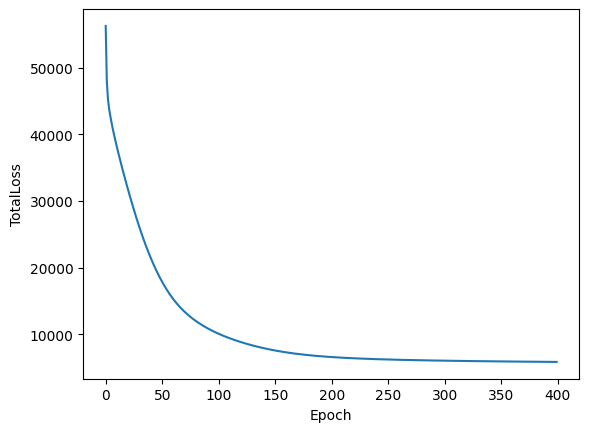

In [142]:
state_dict = model.state_dict()
print(state_dict.keys())
w = state_dict['embeddings.weight']
w.size()
print(w.size())
print(vocab_size)
print(w)

x = [i for i in range(EPOCH_SIZE)]
#print(x)
#print(losses)
plt.plot(x,losses)
plt.xlabel('Epoch')
plt.ylabel('TotalLoss')
plt.savefig('./output/graph2.png')
plt.show()


In [143]:
import pickle
with open('./output/vocab2.pkl','wb') as f:
    pickle.dump(word_to_ix,f)

print(word_to_ix)

{'the': 0, 'activ': 1, 'of': 2, 'learn': 3, 'or': 4, 'be': 5, 'train': 6, 'gradual': 7, 'process': 8, 'acquir': 9, 'knowledg': 10, 'thin': 11, 'metal': 12, 'strip': 13, 'use': 14, 'in': 15, 'typeset': 16, 'to': 17, 'separ': 18, 'line': 19, 'type': 20, 'print': 21, 'falcon': 22, 'abandon': 23, 'intend': 24, 'game': 25, 'and': 26, 'pursu': 27, 'lesser': 28, 'prey': 29, 'turn': 30, 'an': 31, 'inferior': 32, 'act': 33, 'design': 34, 'a': 35, 'role': 36, 'someon': 37, 'identifi': 38, 'someth': 39, 'make': 40, 'pure': 41, 'free': 42, 'from': 43, 'sin': 44, 'guilt': 45, 'leav': 46, 'undon': 47, 'out': 48, 'fail': 49, 'do': 50, 'something': 51, 'social': 52, 'set': 53, 'cliqu': 54, 'friend': 55, 'unoffici': 56, 'associ': 57, 'peopl': 58, 'group': 59, 'upper': 60, 'part': 61, 'column': 62, 'that': 63, 'support': 64, 'entablatur': 65, 'sink': 66, 'lower': 67, 'level': 68, 'descend': 69, 'form': 70, 'depress': 71, 'creat': 72, 'code': 73, 'comput': 74, 'program': 75, 'write': 76, 'releas': 77, 'c

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# import numpy as np
# import urllib.request
# from nltk.tokenize import RegexpTokenizer
# from nltk.corpus import stopwords
# from nltk import word_tokenize
# import sklearn
# from sklearn.cluster import KMeans
# from sklearn.metrics.pairwise import euclidean_distances

# torch.manual_seed(1)

# CONTEXT_SIZE = 3
# EMBEDDING_DIM = 10

# test_sentence = """Empathy for the poor may not come easily to people who never experienced it. They may blame the victims and insist their predicament can be overcome through determination and hard work.
# But they may not realize that extreme poverty can be psychologically and physically incapacitating — a perpetual cycle of bad diets, health care and education exacerbated by the shaming and self-fulfilling prophecies that define it in the public imagination.
# Gordon Parks — perhaps more than any artist — saw poverty as “the most savage of all human afflictions” and realized the power of empathy to help us understand it. It was neither an abstract problem nor political symbol, but something he endured growing up destitute in rural Kansas and having spent years documenting poverty throughout the world, including the United States.
# That sensitivity informed “Freedom’s Fearful Foe: Poverty,” his celebrated photo essay published in Life magazine in June 1961. He took readers into the lives of a Brazilian boy, Flavio da Silva, and his family, who lived in the ramshackle Catacumba favela in the hills outside Rio de Janeiro. These stark photographs are the subject of a new book, “Gordon Parks: The Flavio Story” (Steidl/The Gordon Parks Foundation), which accompanies a traveling exhibition co-organized by the Ryerson Image Centre in Toronto, where it opens this week, and the J. Paul Getty Museum. Edited with texts by the exhibition’s co-curators, Paul Roth and Amanda Maddox, the book also includes a recent interview with Mr. da Silva and essays by Beatriz Jaguaribe, Maria Alice Rezende de Carvalho and Sérgio Burgi.
# """.split()
# # we should tokenize the input, but we will ignore that for now
# # build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)

# #print(test_sentence)
# print(len(test_sentence))
# def get_key(word_id):
#     for key,val in word_to_ix.items():
#         if(val == word_id):
#             print(key)

# def cluster_embeddings(filename,nclusters):
#     X = np.load(filename)
#     kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(X)
#     center = kmeans.cluster_centers_
#     distances = euclidean_distances(X,center)

#     for i in np.arange(0,distances.shape[1]):
#         word_id = np.argmin(distances[:,i])
#         print(word_id)
#         get_key(word_id)

# def read_data(file_path):
#     tokenizer = RegexpTokenizer(r'\w+')
#     data = urllib.request.urlopen(file_path)
#     data = data.read().decode('utf8')
#     tokenized_data = word_tokenize(data)
#     stop_words = set(stopwords.words('english'))
#     stop_words.update(['.',',',':',';','(',')','#','--','...','"'])
#     cleaned_words = [ i for i in tokenized_data if i not in stop_words ]
#     return(cleaned_words)

# #test_sentence = read_data('https://www.gutenberg.org/files/57884/57884-0.txt')

# ngrams = []
# for i in range(len(test_sentence) - CONTEXT_SIZE):
#     tup = [test_sentence[j] for j in np.arange(i , i + CONTEXT_SIZE) ]
#     ngrams.append((tup,test_sentence[i + CONTEXT_SIZE]))
# # print the first 3, just so you can see what they look like
# print(ngrams)


# vocab = set(test_sentence)
# print(vocab)
# print("Length of vocabulary",len(vocab))
# word_to_ix = {word: i for i, word in enumerate(vocab)}
# print(word_to_ix)


# class CBOWModeler(nn.Module):

#     def __init__(self, vocab_size, embedding_dim, context_size):
#         super(CBOWModeler, self).__init__()
#         self.embeddings = nn.Embedding(vocab_size, embedding_dim)
#         self.linear1 = nn.Linear(context_size * embedding_dim, 128)
#         self.linear2 = nn.Linear(128, vocab_size)

#     def forward(self, inputs):
#         embeds = self.embeddings(inputs).view((1, -1))  # -1 implies size inferred for that index from the size of the data
#         #print(np.mean(np.mean(self.linear2.weight.data.numpy())))
#         out1 = F.relu(self.linear1(embeds)) # output of first layer
#         out2 = self.linear2(out1)           # output of second layer
#         #print(embeds)
#         log_probs = F.log_softmax(out2, dim=1)
#         return log_probs

#     def predict(self,input):
#         context_idxs = torch.tensor([word_to_ix[w] for w in input], dtype=torch.long)
#         res = self.forward(context_idxs)
#         res_arg = torch.argmax(res)
#         res_val, res_ind = res.sort(descending=True)
#         res_val = res_val[0][:3]
#         res_ind = res_ind[0][:3]
#         #print(res_val)
#         #print(res_ind)
#         for arg in zip(res_val,res_ind):
#             #print(arg)
#             print([(key,val,arg[0]) for key,val in word_to_ix.items() if val == arg[1]])

#     def freeze_layer(self,layer):
#         for name,child in model.named_children():
#             print(name,child)
#             if(name == layer):
#                 for names,params in child.named_parameters():
#                     print(names,params)
#                     print(params.size())
#                     params.requires_grad= False

#     def print_layer_parameters(self):
#         for name,child in model.named_children():
#                 print(name,child)
#                 for names,params in child.named_parameters():
#                     print(names,params)
#                     print(params.size())

#     def write_embedding_to_file(self,filename):
#         for i in self.embeddings.parameters():
#             weights = i.data.numpy()
#         np.save(filename,weights)



# losses = []
# loss_function = nn.NLLLoss()
# model = CBOWModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
# optimizer = optim.SGD(model.parameters(), lr=0.001)

# # Freeze embedding layer
# #model.freeze_layer('embeddings')


# for epoch in range(400):
#     total_loss = 0
#     #------- Embedding layers are trained as well here ----#
#     #lookup_tensor = torch.tensor([word_to_ix["poor"]], dtype=torch.long)
#     #hello_embed = model.embeddings(lookup_tensor)
#     #print(hello_embed)
#     # -----------------------------------------------------#

#     for context, target in ngrams:

#         # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
#         # into integer indices and wrap them in tensors)
#         context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
#         #print("Context id",context_idxs)

#         # Step 2. Recall that torch *accumulates* gradients. Before passing in a
#         # new instance, you need to zero out the gradients from the old
#         # instance
#         model.zero_grad()

#         # Step 3. Run the forward pass, getting log probabilities over next
#         # words
#         print(epoch)
#         print(context_idxs)
#         log_probs = model(context_idxs)
#         #print(log_probs)

#         # Step 4. Compute your loss function. (Again, Torch wants the target
#         # word wrapped in a tensor)
#         loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
#         #print(loss)

#         # Step 5. Do the backward pass and update the gradient
#         loss.backward()
#         optimizer.step()

#         # Get the Python number from a 1-element Tensor by calling tensor.item()
#         total_loss += loss.item()
#     print(total_loss)
#     losses.append(total_loss)
# #print(losses)  # The loss decreased every iteration over the training data!

# #Print the model layer parameters
# #model.print_layer_parameters()

# #Predict the next word given n context words
# model.predict(['of','all','human'])
# model.write_embedding_to_file('embeddings.npy')
# cluster_embeddings('embeddings.npy',2)

10
tensor([146,  40, 149])
10
tensor([ 40, 149, 118])
10
tensor([149, 118,  85])
10
tensor([118,  85,   5])
10
tensor([85,  5, 96])
10
tensor([  5,  96, 180])
10
tensor([ 96, 180, 158])
10
tensor([180, 158, 104])
10
tensor([158, 104,  10])
10
tensor([104,  10,  96])
10
tensor([ 10,  96, 180])
10
tensor([ 96, 180, 189])
10
tensor([180, 189, 187])
10
tensor([189, 187, 165])
10
tensor([187, 165, 177])
10
tensor([165, 177,  54])
10
tensor([177,  54,  43])
10
tensor([ 54,  43, 166])
10
tensor([ 43, 166,  79])
10
tensor([166,  79,  94])
10
tensor([ 79,  94, 180])
10
tensor([ 94, 180, 192])
10
tensor([180, 192,  49])
10
tensor([192,  49, 117])
10
tensor([ 49, 117, 151])
10
tensor([117, 151, 171])
10
tensor([151, 171, 108])
10
tensor([171, 108, 119])
10
tensor([108, 119, 144])
10
tensor([119, 144,  76])
10
tensor([144,  76, 152])
10
tensor([ 76, 152,  71])
10
tensor([152,  71,  18])
10
tensor([71, 18, 87])
10
tensor([18, 87, 15])
10
tensor([ 87,  15, 125])
10
tensor([ 15, 125,  73])
10
tensor(

12
tensor([178,  40, 153])
12
tensor([ 40, 153, 132])
12
tensor([153, 132,  86])
12
tensor([132,  86, 117])
12
tensor([ 86, 117,  37])
12
tensor([117,  37,  13])
12
tensor([37, 13, 49])
12
tensor([ 13,  49, 142])
12
tensor([ 49, 142, 193])
12
tensor([142, 193, 102])
12
tensor([193, 102, 181])
12
tensor([102, 181,  40])
12
tensor([181,  40,   1])
12
tensor([40,  1,  4])
12
tensor([ 1,  4, 35])
12
tensor([  4,  35, 180])
12
tensor([ 35, 180,  63])
12
tensor([180,  63,  40])
12
tensor([63, 40, 75])
12
tensor([40, 75, 28])
12
tensor([75, 28, 48])
12
tensor([ 28,  48, 106])
12
tensor([ 48, 106, 133])
12
tensor([106, 133,  96])
12
tensor([133,  96, 180])
12
tensor([ 96, 180, 169])
12
tensor([180, 169,  89])
12
tensor([169,  89,  18])
12
tensor([89, 18, 87])
12
tensor([18, 87, 86])
12
tensor([87, 86, 98])
12
tensor([ 86,  98, 105])
12
tensor([ 98, 105, 139])
12
tensor([105, 139,  70])
12
tensor([139,  70,  51])
12
tensor([70, 51, 86])
12
tensor([ 51,  86, 112])
12
tensor([ 86, 112, 186])
12
t

13
tensor([180, 189, 187])
13
tensor([189, 187, 165])
13
tensor([187, 165, 177])
13
tensor([165, 177,  54])
13
tensor([177,  54,  43])
13
tensor([ 54,  43, 166])
13
tensor([ 43, 166,  79])
13
tensor([166,  79,  94])
13
tensor([ 79,  94, 180])
13
tensor([ 94, 180, 192])
13
tensor([180, 192,  49])
13
tensor([192,  49, 117])
13
tensor([ 49, 117, 151])
13
tensor([117, 151, 171])
13
tensor([151, 171, 108])
13
tensor([171, 108, 119])
13
tensor([108, 119, 144])
13
tensor([119, 144,  76])
13
tensor([144,  76, 152])
13
tensor([ 76, 152,  71])
13
tensor([152,  71,  18])
13
tensor([71, 18, 87])
13
tensor([18, 87, 15])
13
tensor([ 87,  15, 125])
13
tensor([ 15, 125,  73])
13
tensor([125,  73, 117])
13
tensor([ 73, 117, 161])
13
tensor([117, 161, 109])
13
tensor([161, 109,  99])
13
tensor([109,  99,  35])
13
tensor([ 99,  35, 180])
13
tensor([ 35, 180, 115])
13
tensor([180, 115,  39])
13
tensor([115,  39, 111])
13
tensor([ 39, 111,  96])
13
tensor([111,  96, 122])
13
tensor([ 96, 122,  30])
13
tens

15
tensor([153, 132,  86])
15
tensor([132,  86, 117])
15
tensor([ 86, 117,  37])
15
tensor([117,  37,  13])
15
tensor([37, 13, 49])
15
tensor([ 13,  49, 142])
15
tensor([ 49, 142, 193])
15
tensor([142, 193, 102])
15
tensor([193, 102, 181])
15
tensor([102, 181,  40])
15
tensor([181,  40,   1])
15
tensor([40,  1,  4])
15
tensor([ 1,  4, 35])
15
tensor([  4,  35, 180])
15
tensor([ 35, 180,  63])
15
tensor([180,  63,  40])
15
tensor([63, 40, 75])
15
tensor([40, 75, 28])
15
tensor([75, 28, 48])
15
tensor([ 28,  48, 106])
15
tensor([ 48, 106, 133])
15
tensor([106, 133,  96])
15
tensor([133,  96, 180])
15
tensor([ 96, 180, 169])
15
tensor([180, 169,  89])
15
tensor([169,  89,  18])
15
tensor([89, 18, 87])
15
tensor([18, 87, 86])
15
tensor([87, 86, 98])
15
tensor([ 86,  98, 105])
15
tensor([ 98, 105, 139])
15
tensor([105, 139,  70])
15
tensor([139,  70,  51])
15
tensor([70, 51, 86])
15
tensor([ 51,  86, 112])
15
tensor([ 86, 112, 186])
15
tensor([112, 186, 188])
15
tensor([186, 188,  93])
15
t

16
tensor([ 49, 117, 151])
16
tensor([117, 151, 171])
16
tensor([151, 171, 108])
16
tensor([171, 108, 119])
16
tensor([108, 119, 144])
16
tensor([119, 144,  76])
16
tensor([144,  76, 152])
16
tensor([ 76, 152,  71])
16
tensor([152,  71,  18])
16
tensor([71, 18, 87])
16
tensor([18, 87, 15])
16
tensor([ 87,  15, 125])
16
tensor([ 15, 125,  73])
16
tensor([125,  73, 117])
16
tensor([ 73, 117, 161])
16
tensor([117, 161, 109])
16
tensor([161, 109,  99])
16
tensor([109,  99,  35])
16
tensor([ 99,  35, 180])
16
tensor([ 35, 180, 115])
16
tensor([180, 115,  39])
16
tensor([115,  39, 111])
16
tensor([ 39, 111,  96])
16
tensor([111,  96, 122])
16
tensor([ 96, 122,  30])
16
tensor([122,  30, 133])
16
tensor([ 30, 133,  55])
16
tensor([133,  55,  16])
16
tensor([55, 16, 45])
16
tensor([16, 45, 40])
16
tensor([ 45,  40, 180])
16
tensor([ 40, 180, 173])
16
tensor([180, 173,   0])
16
tensor([173,   0,  65])
16
tensor([  0,  65, 150])
16
tensor([ 65, 150,  74])
16
tensor([150,  74, 129])
16
tensor([ 7

18
tensor([142, 193, 102])
18
tensor([193, 102, 181])
18
tensor([102, 181,  40])
18
tensor([181,  40,   1])
18
tensor([40,  1,  4])
18
tensor([ 1,  4, 35])
18
tensor([  4,  35, 180])
18
tensor([ 35, 180,  63])
18
tensor([180,  63,  40])
18
tensor([63, 40, 75])
18
tensor([40, 75, 28])
18
tensor([75, 28, 48])
18
tensor([ 28,  48, 106])
18
tensor([ 48, 106, 133])
18
tensor([106, 133,  96])
18
tensor([133,  96, 180])
18
tensor([ 96, 180, 169])
18
tensor([180, 169,  89])
18
tensor([169,  89,  18])
18
tensor([89, 18, 87])
18
tensor([18, 87, 86])
18
tensor([87, 86, 98])
18
tensor([ 86,  98, 105])
18
tensor([ 98, 105, 139])
18
tensor([105, 139,  70])
18
tensor([139,  70,  51])
18
tensor([70, 51, 86])
18
tensor([ 51,  86, 112])
18
tensor([ 86, 112, 186])
18
tensor([112, 186, 188])
18
tensor([186, 188,  93])
18
tensor([188,  93, 156])
18
tensor([ 93, 156, 127])
18
tensor([156, 127,  49])
18
tensor([127,  49,  88])
18
tensor([ 49,  88, 194])
18
tensor([ 88, 194, 160])
18
tensor([194, 160,  40])
1

19
tensor([ 40, 149, 118])
19
tensor([149, 118,  85])
19
tensor([118,  85,   5])
19
tensor([85,  5, 96])
19
tensor([  5,  96, 180])
19
tensor([ 96, 180, 158])
19
tensor([180, 158, 104])
19
tensor([158, 104,  10])
19
tensor([104,  10,  96])
19
tensor([ 10,  96, 180])
19
tensor([ 96, 180, 189])
19
tensor([180, 189, 187])
19
tensor([189, 187, 165])
19
tensor([187, 165, 177])
19
tensor([165, 177,  54])
19
tensor([177,  54,  43])
19
tensor([ 54,  43, 166])
19
tensor([ 43, 166,  79])
19
tensor([166,  79,  94])
19
tensor([ 79,  94, 180])
19
tensor([ 94, 180, 192])
19
tensor([180, 192,  49])
19
tensor([192,  49, 117])
19
tensor([ 49, 117, 151])
19
tensor([117, 151, 171])
19
tensor([151, 171, 108])
19
tensor([171, 108, 119])
19
tensor([108, 119, 144])
19
tensor([119, 144,  76])
19
tensor([144,  76, 152])
19
tensor([ 76, 152,  71])
19
tensor([152,  71,  18])
19
tensor([71, 18, 87])
19
tensor([18, 87, 15])
19
tensor([ 87,  15, 125])
19
tensor([ 15, 125,  73])
19
tensor([125,  73, 117])
19
tensor(

21
tensor([40, 17, 11])
21
tensor([ 17,  11, 143])
21
tensor([ 11, 143, 138])
21
tensor([143, 138,  80])
21
tensor([138,  80,  66])
21
tensor([ 80,  66, 154])
21
tensor([ 66, 154,  48])
21
tensor([154,  48,  84])
21
tensor([ 48,  84, 186])
21
tensor([ 84, 186,  47])
21
tensor([186,  47, 183])
21
tensor([ 47, 183, 178])
21
tensor([183, 178,  40])
21
tensor([178,  40, 153])
21
tensor([ 40, 153, 132])
21
tensor([153, 132,  86])
21
tensor([132,  86, 117])
21
tensor([ 86, 117,  37])
21
tensor([117,  37,  13])
21
tensor([37, 13, 49])
21
tensor([ 13,  49, 142])
21
tensor([ 49, 142, 193])
21
tensor([142, 193, 102])
21
tensor([193, 102, 181])
21
tensor([102, 181,  40])
21
tensor([181,  40,   1])
21
tensor([40,  1,  4])
21
tensor([ 1,  4, 35])
21
tensor([  4,  35, 180])
21
tensor([ 35, 180,  63])
21
tensor([180,  63,  40])
21
tensor([63, 40, 75])
21
tensor([40, 75, 28])
21
tensor([75, 28, 48])
21
tensor([ 28,  48, 106])
21
tensor([ 48, 106, 133])
21
tensor([106, 133,  96])
21
tensor([133,  96, 1

22
tensor([ 49, 117,  46])
22
tensor([117,  46,  59])
22
tensor([46, 59, 76])
22
tensor([59, 76,  3])
22
tensor([ 76,   3, 146])
22
tensor([  3, 146,  40])
22
tensor([146,  40, 149])
22
tensor([ 40, 149, 118])
22
tensor([149, 118,  85])
22
tensor([118,  85,   5])
22
tensor([85,  5, 96])
22
tensor([  5,  96, 180])
22
tensor([ 96, 180, 158])
22
tensor([180, 158, 104])
22
tensor([158, 104,  10])
22
tensor([104,  10,  96])
22
tensor([ 10,  96, 180])
22
tensor([ 96, 180, 189])
22
tensor([180, 189, 187])
22
tensor([189, 187, 165])
22
tensor([187, 165, 177])
22
tensor([165, 177,  54])
22
tensor([177,  54,  43])
22
tensor([ 54,  43, 166])
22
tensor([ 43, 166,  79])
22
tensor([166,  79,  94])
22
tensor([ 79,  94, 180])
22
tensor([ 94, 180, 192])
22
tensor([180, 192,  49])
22
tensor([192,  49, 117])
22
tensor([ 49, 117, 151])
22
tensor([117, 151, 171])
22
tensor([151, 171, 108])
22
tensor([171, 108, 119])
22
tensor([108, 119, 144])
22
tensor([119, 144,  76])
22
tensor([144,  76, 152])
22
tensor(

24
tensor([ 27,  44, 137])
24
tensor([ 44, 137,  47])
24
tensor([137,  47, 183])
24
tensor([ 47, 183,  41])
24
tensor([183,  41,  25])
24
tensor([ 41,  25, 184])
24
tensor([ 25, 184,  40])
24
tensor([184,  40,  17])
24
tensor([40, 17, 11])
24
tensor([ 17,  11, 143])
24
tensor([ 11, 143, 138])
24
tensor([143, 138,  80])
24
tensor([138,  80,  66])
24
tensor([ 80,  66, 154])
24
tensor([ 66, 154,  48])
24
tensor([154,  48,  84])
24
tensor([ 48,  84, 186])
24
tensor([ 84, 186,  47])
24
tensor([186,  47, 183])
24
tensor([ 47, 183, 178])
24
tensor([183, 178,  40])
24
tensor([178,  40, 153])
24
tensor([ 40, 153, 132])
24
tensor([153, 132,  86])
24
tensor([132,  86, 117])
24
tensor([ 86, 117,  37])
24
tensor([117,  37,  13])
24
tensor([37, 13, 49])
24
tensor([ 13,  49, 142])
24
tensor([ 49, 142, 193])
24
tensor([142, 193, 102])
24
tensor([193, 102, 181])
24
tensor([102, 181,  40])
24
tensor([181,  40,   1])
24
tensor([40,  1,  4])
24
tensor([ 1,  4, 35])
24
tensor([  4,  35, 180])
24
tensor([ 3

25
tensor([190, 110,  58])
25
tensor([110,  58, 101])
25
tensor([ 58, 101, 180])
25
tensor([101, 180, 103])
25
tensor([180, 103,  49])
25
tensor([103,  49, 117])
25
tensor([ 49, 117,  46])
25
tensor([117,  46,  59])
25
tensor([46, 59, 76])
25
tensor([59, 76,  3])
25
tensor([ 76,   3, 146])
25
tensor([  3, 146,  40])
25
tensor([146,  40, 149])
25
tensor([ 40, 149, 118])
25
tensor([149, 118,  85])
25
tensor([118,  85,   5])
25
tensor([85,  5, 96])
25
tensor([  5,  96, 180])
25
tensor([ 96, 180, 158])
25
tensor([180, 158, 104])
25
tensor([158, 104,  10])
25
tensor([104,  10,  96])
25
tensor([ 10,  96, 180])
25
tensor([ 96, 180, 189])
25
tensor([180, 189, 187])
25
tensor([189, 187, 165])
25
tensor([187, 165, 177])
25
tensor([165, 177,  54])
25
tensor([177,  54,  43])
25
tensor([ 54,  43, 166])
25
tensor([ 43, 166,  79])
25
tensor([166,  79,  94])
25
tensor([ 79,  94, 180])
25
tensor([ 94, 180, 192])
25
tensor([180, 192,  49])
25
tensor([192,  49, 117])
25
tensor([ 49, 117, 151])
25
tensor(

27
tensor([12, 40, 27])
27
tensor([40, 27, 44])
27
tensor([ 27,  44, 137])
27
tensor([ 44, 137,  47])
27
tensor([137,  47, 183])
27
tensor([ 47, 183,  41])
27
tensor([183,  41,  25])
27
tensor([ 41,  25, 184])
27
tensor([ 25, 184,  40])
27
tensor([184,  40,  17])
27
tensor([40, 17, 11])
27
tensor([ 17,  11, 143])
27
tensor([ 11, 143, 138])
27
tensor([143, 138,  80])
27
tensor([138,  80,  66])
27
tensor([ 80,  66, 154])
27
tensor([ 66, 154,  48])
27
tensor([154,  48,  84])
27
tensor([ 48,  84, 186])
27
tensor([ 84, 186,  47])
27
tensor([186,  47, 183])
27
tensor([ 47, 183, 178])
27
tensor([183, 178,  40])
27
tensor([178,  40, 153])
27
tensor([ 40, 153, 132])
27
tensor([153, 132,  86])
27
tensor([132,  86, 117])
27
tensor([ 86, 117,  37])
27
tensor([117,  37,  13])
27
tensor([37, 13, 49])
27
tensor([ 13,  49, 142])
27
tensor([ 49, 142, 193])
27
tensor([142, 193, 102])
27
tensor([193, 102, 181])
27
tensor([102, 181,  40])
27
tensor([181,  40,   1])
27
tensor([40,  1,  4])
27
tensor([ 1,  

28
tensor([ 96, 162,  61])
28
tensor([162,  61,  96])
28
tensor([ 61,  96, 121])
28
tensor([ 96, 121,  83])
28
tensor([121,  83, 190])
28
tensor([ 83, 190, 110])
28
tensor([190, 110,  58])
28
tensor([110,  58, 101])
28
tensor([ 58, 101, 180])
28
tensor([101, 180, 103])
28
tensor([180, 103,  49])
28
tensor([103,  49, 117])
28
tensor([ 49, 117,  46])
28
tensor([117,  46,  59])
28
tensor([46, 59, 76])
28
tensor([59, 76,  3])
28
tensor([ 76,   3, 146])
28
tensor([  3, 146,  40])
28
tensor([146,  40, 149])
28
tensor([ 40, 149, 118])
28
tensor([149, 118,  85])
28
tensor([118,  85,   5])
28
tensor([85,  5, 96])
28
tensor([  5,  96, 180])
28
tensor([ 96, 180, 158])
28
tensor([180, 158, 104])
28
tensor([158, 104,  10])
28
tensor([104,  10,  96])
28
tensor([ 10,  96, 180])
28
tensor([ 96, 180, 189])
28
tensor([180, 189, 187])
28
tensor([189, 187, 165])
28
tensor([187, 165, 177])
28
tensor([165, 177,  54])
28
tensor([177,  54,  43])
28
tensor([ 54,  43, 166])
28
tensor([ 43, 166,  79])
28
tensor(

30
tensor([ 41,  25, 184])
30
tensor([ 25, 184,  40])
30
tensor([184,  40,  17])
30
tensor([40, 17, 11])
30
tensor([ 17,  11, 143])
30
tensor([ 11, 143, 138])
30
tensor([143, 138,  80])
30
tensor([138,  80,  66])
30
tensor([ 80,  66, 154])
30
tensor([ 66, 154,  48])
30
tensor([154,  48,  84])
30
tensor([ 48,  84, 186])
30
tensor([ 84, 186,  47])
30
tensor([186,  47, 183])
30
tensor([ 47, 183, 178])
30
tensor([183, 178,  40])
30
tensor([178,  40, 153])
30
tensor([ 40, 153, 132])
30
tensor([153, 132,  86])
30
tensor([132,  86, 117])
30
tensor([ 86, 117,  37])
30
tensor([117,  37,  13])
30
tensor([37, 13, 49])
30
tensor([ 13,  49, 142])
30
tensor([ 49, 142, 193])
30
tensor([142, 193, 102])
30
tensor([193, 102, 181])
30
tensor([102, 181,  40])
30
tensor([181,  40,   1])
30
tensor([40,  1,  4])
30
tensor([ 1,  4, 35])
30
tensor([  4,  35, 180])
30
tensor([ 35, 180,  63])
30
tensor([180,  63,  40])
30
tensor([63, 40, 75])
30
tensor([40, 75, 28])
30
tensor([75, 28, 48])
30
tensor([ 28,  48, 1

31
tensor([159,  96, 162])
31
tensor([ 96, 162,  61])
31
tensor([162,  61,  96])
31
tensor([ 61,  96, 121])
31
tensor([ 96, 121,  83])
31
tensor([121,  83, 190])
31
tensor([ 83, 190, 110])
31
tensor([190, 110,  58])
31
tensor([110,  58, 101])
31
tensor([ 58, 101, 180])
31
tensor([101, 180, 103])
31
tensor([180, 103,  49])
31
tensor([103,  49, 117])
31
tensor([ 49, 117,  46])
31
tensor([117,  46,  59])
31
tensor([46, 59, 76])
31
tensor([59, 76,  3])
31
tensor([ 76,   3, 146])
31
tensor([  3, 146,  40])
31
tensor([146,  40, 149])
31
tensor([ 40, 149, 118])
31
tensor([149, 118,  85])
31
tensor([118,  85,   5])
31
tensor([85,  5, 96])
31
tensor([  5,  96, 180])
31
tensor([ 96, 180, 158])
31
tensor([180, 158, 104])
31
tensor([158, 104,  10])
31
tensor([104,  10,  96])
31
tensor([ 10,  96, 180])
31
tensor([ 96, 180, 189])
31
tensor([180, 189, 187])
31
tensor([189, 187, 165])
31
tensor([187, 165, 177])
31
tensor([165, 177,  54])
31
tensor([177,  54,  43])
31
tensor([ 54,  43, 166])
31
tensor(

33
tensor([ 34, 180,  12])
33
tensor([180,  12,  40])
33
tensor([12, 40, 27])
33
tensor([40, 27, 44])
33
tensor([ 27,  44, 137])
33
tensor([ 44, 137,  47])
33
tensor([137,  47, 183])
33
tensor([ 47, 183,  41])
33
tensor([183,  41,  25])
33
tensor([ 41,  25, 184])
33
tensor([ 25, 184,  40])
33
tensor([184,  40,  17])
33
tensor([40, 17, 11])
33
tensor([ 17,  11, 143])
33
tensor([ 11, 143, 138])
33
tensor([143, 138,  80])
33
tensor([138,  80,  66])
33
tensor([ 80,  66, 154])
33
tensor([ 66, 154,  48])
33
tensor([154,  48,  84])
33
tensor([ 48,  84, 186])
33
tensor([ 84, 186,  47])
33
tensor([186,  47, 183])
33
tensor([ 47, 183, 178])
33
tensor([183, 178,  40])
33
tensor([178,  40, 153])
33
tensor([ 40, 153, 132])
33
tensor([153, 132,  86])
33
tensor([132,  86, 117])
33
tensor([ 86, 117,  37])
33
tensor([117,  37,  13])
33
tensor([37, 13, 49])
33
tensor([ 13,  49, 142])
33
tensor([ 49, 142, 193])
33
tensor([142, 193, 102])
33
tensor([193, 102, 181])
33
tensor([102, 181,  40])
33
tensor([18

34
tensor([159,  96, 162])
34
tensor([ 96, 162,  61])
34
tensor([162,  61,  96])
34
tensor([ 61,  96, 121])
34
tensor([ 96, 121,  83])
34
tensor([121,  83, 190])
34
tensor([ 83, 190, 110])
34
tensor([190, 110,  58])
34
tensor([110,  58, 101])
34
tensor([ 58, 101, 180])
34
tensor([101, 180, 103])
34
tensor([180, 103,  49])
34
tensor([103,  49, 117])
34
tensor([ 49, 117,  46])
34
tensor([117,  46,  59])
34
tensor([46, 59, 76])
34
tensor([59, 76,  3])
34
tensor([ 76,   3, 146])
34
tensor([  3, 146,  40])
34
tensor([146,  40, 149])
34
tensor([ 40, 149, 118])
34
tensor([149, 118,  85])
34
tensor([118,  85,   5])
34
tensor([85,  5, 96])
34
tensor([  5,  96, 180])
34
tensor([ 96, 180, 158])
34
tensor([180, 158, 104])
34
tensor([158, 104,  10])
34
tensor([104,  10,  96])
34
tensor([ 10,  96, 180])
34
tensor([ 96, 180, 189])
34
tensor([180, 189, 187])
34
tensor([189, 187, 165])
34
tensor([187, 165, 177])
34
tensor([165, 177,  54])
34
tensor([177,  54,  43])
34
tensor([ 54,  43, 166])
34
tensor(

35
tensor([ 95, 172, 177])
35
tensor([172, 177,   6])
35
tensor([177,   6,  40])
35
tensor([  6,  40, 164])
1101.9095811843872
36
tensor([ 92,  69, 180])
36
tensor([ 69, 180, 179])
36
tensor([180, 179,  80])
36
tensor([179,  80,  66])
36
tensor([ 80,  66, 141])
36
tensor([ 66, 141, 163])
36
tensor([141, 163,  72])
36
tensor([163,  72,  29])
36
tensor([72, 29, 85])
36
tensor([29, 85, 97])
36
tensor([85, 97, 24])
36
tensor([ 97,  24, 168])
36
tensor([ 24, 168, 134])
36
tensor([168, 134,  80])
36
tensor([134,  80,  34])
36
tensor([ 80,  34, 180])
36
tensor([ 34, 180,  12])
36
tensor([180,  12,  40])
36
tensor([12, 40, 27])
36
tensor([40, 27, 44])
36
tensor([ 27,  44, 137])
36
tensor([ 44, 137,  47])
36
tensor([137,  47, 183])
36
tensor([ 47, 183,  41])
36
tensor([183,  41,  25])
36
tensor([ 41,  25, 184])
36
tensor([ 25, 184,  40])
36
tensor([184,  40,  17])
36
tensor([40, 17, 11])
36
tensor([ 17,  11, 143])
36
tensor([ 11, 143, 138])
36
tensor([143, 138,  80])
36
tensor([138,  80,  66])


37
tensor([ 72, 113,  32])
37
tensor([113,  32, 116])
37
tensor([ 32, 116, 168])
37
tensor([116, 168,  14])
37
tensor([168,  14,   7])
37
tensor([14,  7, 64])
37
tensor([  7,  64, 145])
37
tensor([ 64, 145, 182])
37
tensor([145, 182,   8])
37
tensor([182,   8, 191])
37
tensor([  8, 191,  50])
37
tensor([191,  50,  62])
37
tensor([ 50,  62, 157])
37
tensor([ 62, 157,   2])
37
tensor([157,   2, 100])
37
tensor([  2, 100,  91])
37
tensor([100,  91, 114])
37
tensor([ 91, 114, 175])
37
tensor([114, 175, 140])
37
tensor([175, 140,  96])
37
tensor([140,  96, 170])
37
tensor([ 96, 170, 128])
37
tensor([170, 128,  40])
37
tensor([128,  40,  57])
37
tensor([ 40,  57, 131])
37
tensor([ 57, 131,  52])
37
tensor([131,  52, 147])
37
tensor([ 52, 147, 186])
37
tensor([147, 186,  82])
37
tensor([186,  82, 180])
37
tensor([ 82, 180, 123])
37
tensor([180, 123, 176])
37
tensor([123, 176, 180])
37
tensor([176, 180,  56])
37
tensor([180,  56, 148])
37
tensor([ 56, 148, 135])
37
tensor([148, 135, 174])
37
t

tensor([151, 171, 108])
38
tensor([171, 108, 119])
38
tensor([108, 119, 144])
38
tensor([119, 144,  76])
38
tensor([144,  76, 152])
38
tensor([ 76, 152,  71])
38
tensor([152,  71,  18])
38
tensor([71, 18, 87])
38
tensor([18, 87, 15])
38
tensor([ 87,  15, 125])
38
tensor([ 15, 125,  73])
38
tensor([125,  73, 117])
38
tensor([ 73, 117, 161])
38
tensor([117, 161, 109])
38
tensor([161, 109,  99])
38
tensor([109,  99,  35])
38
tensor([ 99,  35, 180])
38
tensor([ 35, 180, 115])
38
tensor([180, 115,  39])
38
tensor([115,  39, 111])
38
tensor([ 39, 111,  96])
38
tensor([111,  96, 122])
38
tensor([ 96, 122,  30])
38
tensor([122,  30, 133])
38
tensor([ 30, 133,  55])
38
tensor([133,  55,  16])
38
tensor([55, 16, 45])
38
tensor([16, 45, 40])
38
tensor([ 45,  40, 180])
38
tensor([ 40, 180, 173])
38
tensor([180, 173,   0])
38
tensor([173,   0,  65])
38
tensor([  0,  65, 150])
38
tensor([ 65, 150,  74])
38
tensor([150,  74, 129])
38
tensor([ 74, 129,  42])
38
tensor([129,  42,  35])
38
tensor([ 42, 

40
tensor([183, 178,  40])
40
tensor([178,  40, 153])
40
tensor([ 40, 153, 132])
40
tensor([153, 132,  86])
40
tensor([132,  86, 117])
40
tensor([ 86, 117,  37])
40
tensor([117,  37,  13])
40
tensor([37, 13, 49])
40
tensor([ 13,  49, 142])
40
tensor([ 49, 142, 193])
40
tensor([142, 193, 102])
40
tensor([193, 102, 181])
40
tensor([102, 181,  40])
40
tensor([181,  40,   1])
40
tensor([40,  1,  4])
40
tensor([ 1,  4, 35])
40
tensor([  4,  35, 180])
40
tensor([ 35, 180,  63])
40
tensor([180,  63,  40])
40
tensor([63, 40, 75])
40
tensor([40, 75, 28])
40
tensor([75, 28, 48])
40
tensor([ 28,  48, 106])
40
tensor([ 48, 106, 133])
40
tensor([106, 133,  96])
40
tensor([133,  96, 180])
40
tensor([ 96, 180, 169])
40
tensor([180, 169,  89])
40
tensor([169,  89,  18])
40
tensor([89, 18, 87])
40
tensor([18, 87, 86])
40
tensor([87, 86, 98])
40
tensor([ 86,  98, 105])
40
tensor([ 98, 105, 139])
40
tensor([105, 139,  70])
40
tensor([139,  70,  51])
40
tensor([70, 51, 86])
40
tensor([ 51,  86, 112])
40
t

41
tensor([ 76,   3, 146])
41
tensor([  3, 146,  40])
41
tensor([146,  40, 149])
41
tensor([ 40, 149, 118])
41
tensor([149, 118,  85])
41
tensor([118,  85,   5])
41
tensor([85,  5, 96])
41
tensor([  5,  96, 180])
41
tensor([ 96, 180, 158])
41
tensor([180, 158, 104])
41
tensor([158, 104,  10])
41
tensor([104,  10,  96])
41
tensor([ 10,  96, 180])
41
tensor([ 96, 180, 189])
41
tensor([180, 189, 187])
41
tensor([189, 187, 165])
41
tensor([187, 165, 177])
41
tensor([165, 177,  54])
41
tensor([177,  54,  43])
41
tensor([ 54,  43, 166])
41
tensor([ 43, 166,  79])
41
tensor([166,  79,  94])
41
tensor([ 79,  94, 180])
41
tensor([ 94, 180, 192])
41
tensor([180, 192,  49])
41
tensor([192,  49, 117])
41
tensor([ 49, 117, 151])
41
tensor([117, 151, 171])
41
tensor([151, 171, 108])
41
tensor([171, 108, 119])
41
tensor([108, 119, 144])
41
tensor([119, 144,  76])
41
tensor([144,  76, 152])
41
tensor([ 76, 152,  71])
41
tensor([152,  71,  18])
41
tensor([71, 18, 87])
41
tensor([18, 87, 15])
41
tensor(

43
tensor([ 47, 183, 178])
43
tensor([183, 178,  40])
43
tensor([178,  40, 153])
43
tensor([ 40, 153, 132])
43
tensor([153, 132,  86])
43
tensor([132,  86, 117])
43
tensor([ 86, 117,  37])
43
tensor([117,  37,  13])
43
tensor([37, 13, 49])
43
tensor([ 13,  49, 142])
43
tensor([ 49, 142, 193])
43
tensor([142, 193, 102])
43
tensor([193, 102, 181])
43
tensor([102, 181,  40])
43
tensor([181,  40,   1])
43
tensor([40,  1,  4])
43
tensor([ 1,  4, 35])
43
tensor([  4,  35, 180])
43
tensor([ 35, 180,  63])
43
tensor([180,  63,  40])
43
tensor([63, 40, 75])
43
tensor([40, 75, 28])
43
tensor([75, 28, 48])
43
tensor([ 28,  48, 106])
43
tensor([ 48, 106, 133])
43
tensor([106, 133,  96])
43
tensor([133,  96, 180])
43
tensor([ 96, 180, 169])
43
tensor([180, 169,  89])
43
tensor([169,  89,  18])
43
tensor([89, 18, 87])
43
tensor([18, 87, 86])
43
tensor([87, 86, 98])
43
tensor([ 86,  98, 105])
43
tensor([ 98, 105, 139])
43
tensor([105, 139,  70])
43
tensor([139,  70,  51])
43
tensor([70, 51, 86])
43
t

44
tensor([46, 59, 76])
44
tensor([59, 76,  3])
44
tensor([ 76,   3, 146])
44
tensor([  3, 146,  40])
44
tensor([146,  40, 149])
44
tensor([ 40, 149, 118])
44
tensor([149, 118,  85])
44
tensor([118,  85,   5])
44
tensor([85,  5, 96])
44
tensor([  5,  96, 180])
44
tensor([ 96, 180, 158])
44
tensor([180, 158, 104])
44
tensor([158, 104,  10])
44
tensor([104,  10,  96])
44
tensor([ 10,  96, 180])
44
tensor([ 96, 180, 189])
44
tensor([180, 189, 187])
44
tensor([189, 187, 165])
44
tensor([187, 165, 177])
44
tensor([165, 177,  54])
44
tensor([177,  54,  43])
44
tensor([ 54,  43, 166])
44
tensor([ 43, 166,  79])
44
tensor([166,  79,  94])
44
tensor([ 79,  94, 180])
44
tensor([ 94, 180, 192])
44
tensor([180, 192,  49])
44
tensor([192,  49, 117])
44
tensor([ 49, 117, 151])
44
tensor([117, 151, 171])
44
tensor([151, 171, 108])
44
tensor([171, 108, 119])
44
tensor([108, 119, 144])
44
tensor([119, 144,  76])
44
tensor([144,  76, 152])
44
tensor([ 76, 152,  71])
44
tensor([152,  71,  18])
44
tensor(

45
tensor([ 42,  35, 180])
45
tensor([ 35, 180,  36])
45
tensor([180,  36, 107])
45
tensor([ 36, 107,   0])
45
tensor([107,   0, 155])
45
tensor([  0, 155,  40])
45
tensor([155,  40,  68])
45
tensor([40, 68, 23])
45
tensor([ 68,  23, 180])
45
tensor([ 23, 180,   9])
45
tensor([180,   9,  38])
45
tensor([ 9, 38, 53])
45
tensor([ 38,  53, 117])
45
tensor([ 53, 117,  60])
45
tensor([117,  60,  90])
45
tensor([ 60,  90, 129])
45
tensor([ 90, 129,  20])
45
tensor([129,  20,   3])
45
tensor([20,  3, 77])
45
tensor([ 3, 77, 40])
45
tensor([ 77,  40, 130])
45
tensor([ 40, 130,  35])
45
tensor([130,  35, 126])
45
tensor([ 35, 126,  22])
45
tensor([126,  22,  33])
45
tensor([22, 33, 95])
45
tensor([ 33,  95, 172])
45
tensor([ 95, 172, 177])
45
tensor([172, 177,   6])
45
tensor([177,   6,  40])
45
tensor([  6,  40, 164])
1030.260410308838
46
tensor([ 92,  69, 180])
46
tensor([ 69, 180, 179])
46
tensor([180, 179,  80])
46
tensor([179,  80,  66])
46
tensor([ 80,  66, 141])
46
tensor([ 66, 141, 163]

KeyboardInterrupt: 

In [144]:
print(sentences)

[['the', 'activ', 'of', 'learn', 'or', 'be', 'train'], ['the', 'gradual', 'process', 'of', 'acquir', 'knowledg'], ['thin', 'metal', 'strip', 'use', 'in', 'typeset'], ['thin', 'strip', 'of', 'metal', 'use', 'to', 'separ', 'line', 'of', 'type', 'in', 'print'], ['falcon', 'abandon', 'intend', 'game', 'and', 'pursu', 'lesser', 'prey'], ['abandon', 'the', 'intend', 'prey', 'turn', 'and', 'pursu', 'an', 'inferior', 'prey'], ['the', 'act', 'of', 'design', 'a', 'role', 'to', 'someon'], ['the', 'act', 'of', 'design', 'or', 'identifi', 'someth'], ['make', 'pure', 'or', 'free', 'from', 'sin'], ['make', 'pure', 'or', 'free', 'from', 'sin', 'or', 'guilt'], ['leav', 'undon', 'or', 'leav', 'out'], ['fail', 'to', 'do', 'something', 'leav', 'someth', 'undon'], ['a', 'social', 'set', 'or', 'cliqu', 'of', 'friend'], ['an', 'unoffici', 'associ', 'of', 'peopl', 'or', 'group'], ['the', 'upper', 'part', 'of', 'a', 'column'], ['the', 'upper', 'part', 'of', 'a', 'column', 'that', 'support', 'the', 'entablatur'